## TITLE - ANALYSIS ON THE SOCIOECONOMIC, HEALTHCARE, AND ENVIRONMENTAL IMPACT ON MORTALITY RATE

## General Overview of the project

Child and infant mortality rates remain a critical issue in Africa, impeding progress toward several Sustainable Development Goals (SDGs), including Goal 3: Good Health and Well-being. By leveraging data-driven approaches, this project aims to identify actionable insights, develop innovative solutions, and contribute to global efforts to reduce preventable deaths in children under five years of age.

### Project Objective:

The primary objective is to utilize the provided datasets to uncover patterns, correlations, and key drivers of child and infant mortality in African countries. Participants will propose data-driven strategies and interventions that policymakers, healthcare providers, and organizations can adopt to improve health outcomes for children.
1. Identify socioeconomic, healthcare, and environmental factors contributing to high mortality
rates.
2. Propose actionable recommendations to address gaps in vaccination coverage, healthcare
access, and maternal support.
3. Present insights in a format that is accessible to policymakers and stakeholders

### Dataset Overview 
The datasets provided for this project include:
1. Health Protection Coverage: Percentage of populations covered by health
insurance.
2. Global Vaccination Coverage: Vaccination rates for various diseases among
children.
3. Births Attended by Skilled Health Staff: The percentage of births assisted by skilled
healthcare providers.
4. Maternal Deaths by Region: Estimated maternal deaths by region and year.
5. Child Mortality by Income Level: Under-five mortality rates across different
income-level countries.
6. Infant Deaths: Annual number of infant deaths by country.
7. Youth Mortality Rates: Mortality rates for individuals under 15.
8. Causes of Death in Children Under Five: Breakdown of major causes of death
among young children.

## Importing Libraries
- When performing EDA on a dataset, first, we import the required data science packages using their alias

In [1]:
# import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Extracting data:
- All the data will be extracted and loaded as a dataframe.

In [2]:
health_protection_df = pd.read_csv("health-protection-coverage.csv")
global_vac_cov_df = pd.read_csv("global-vaccination-coverage.csv")
birth_attended_df = pd.read_csv("births-attended-by-health-staff-sdgs.csv")
maternal_by_region_df = pd.read_csv("number-of-maternal-deaths-by-region.csv")
child_mortality_df = pd.read_csv("child-mortality-by-income-level-of-country.csv")
infant_death_df = pd.read_csv("number-of-infant-deaths-unwpp.csv")
youth_mort_rate = pd.read_csv("youth-mortality-rate.csv")
cause_of_death_df = pd.read_csv("Distribution of Causes of Death among Children Aged less than 5 years.csv")

#### lets take a peek into what our data looks like by calling '.head' on all the dataset

In [3]:
health_protection_df.head(2)

,Entity,Code,Year,Share of population covered by health insurance (ILO (2014))
0,Albania,ALB,2008,23.6
1,Algeria,DZA,2005,85.2


In [4]:
global_vac_cov_df.head(3)

,Entity,Code,Year,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized)
0,Afghanistan,AFG,1982,10.0,NaN,NaN,NaN,8.0,NaN,5.0,NaN,NaN,NaN,5.0
1,Afghanistan,AFG,1983,10.0,NaN,NaN,NaN,9.0,NaN,5.0,NaN,NaN,NaN,5.0
2,Afghanistan,AFG,1984,11.0,NaN,NaN,NaN,14.0,NaN,16.0,NaN,NaN,NaN,16.0


In [5]:
birth_attended_df.head(2)

,Entity,Code,Year,Births attended by skilled health staff (% of total)
0,Afghanistan,AFG,2000,12.4
1,Afghanistan,AFG,2003,14.3


In [6]:
maternal_by_region_df.head(2)

,Entity,Code,Year,Estimated maternal deaths,959828-annotations
0,Afghanistan,AFG,1985,10258.534,NaN
1,Afghanistan,AFG,1986,8671.921,NaN


In [7]:
child_mortality_df.head(2)

,Entity,Code,Year,Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births
0,Afghanistan,AFG,1957,37.245758
1,Afghanistan,AFG,1958,36.626625


In [8]:
# Quickly rename the observation value column as it is too long

child_mortality_df.rename(columns = {'Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births' : 'Under-five mortality rate'}, inplace = True)

child_mortality_df.head(2)

,Entity,Code,Year,Under-five mortality rate
0,Afghanistan,AFG,1957,37.245758
1,Afghanistan,AFG,1958,36.626625


In [9]:
infant_death_df.head(2)

,Entity,Code,Year,Deaths - Sex: all - Age: 0 - Variant: estimates
0,Afghanistan,AFG,1950,109220.0
1,Afghanistan,AFG,1951,107971.0


In [10]:
# Quickly rename the death column

infant_death_df.rename(columns = {'Deaths - Sex: all - Age: 0 - Variant: estimates' : 'Number of infant Death'}, inplace = True)

infant_death_df.head(2)

,Entity,Code,Year,Number of infant Death
0,Afghanistan,AFG,1950,109220.0
1,Afghanistan,AFG,1951,107971.0


In [11]:
youth_mort_rate.head(2)

,Entity,Code,Year,Under-fifteen mortality rate
0,Afghanistan,AFG,1977,30.110573
1,Afghanistan,AFG,1978,29.290777


In [12]:
cause_of_death_df.head(2)

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z
1,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z


In [13]:
cause_of_death_df.columns

Index(['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode',
       'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Location',
       'Period type', 'Period', 'IsLatestYear', 'Dim1 type', 'Dim1',
       'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type',
       'Dim3', 'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource',
       'FactValueNumericPrefix', 'FactValueNumeric', 'FactValueUoM',
       'FactValueNumericLowPrefix', 'FactValueNumericLow',
       'FactValueNumericHighPrefix', 'FactValueNumericHigh', 'Value',
       'FactValueTranslationID', 'FactComments', 'Language', 'DateModified'],
      dtype='object')

### Looking at the column bulkiness, lets take a close look at the dataset and see if there are columns we will need to drop

In [14]:
# check the number of rows and columns of the dataset

cause_of_death_df.shape

(146664, 34)

In [15]:
# check for missing values

cause_of_death_df.isnull().sum()

IndicatorCode                      0
Indicator                          0
ValueType                          0
ParentLocationCode                 0
ParentLocation                     0
Location type                      0
SpatialDimValueCode                0
Location                           0
Period type                        0
Period                             0
IsLatestYear                       0
Dim1 type                          0
Dim1                               0
Dim1ValueCode                      0
Dim2 type                          0
Dim2                               0
Dim2ValueCode                      0
Dim3 type                     146664
Dim3                          146664
Dim3ValueCode                 146664
DataSourceDimValueCode        146664
DataSource                    146664
FactValueNumericPrefix        146664
FactValueNumeric                   0
FactValueUoM                  146664
FactValueNumericLowPrefix     146664
FactValueNumericLow           146664
F

### From the above result we can see that the dataset has 146664 rows and some of the columns has the same number of missing values, we will go ahead to drop those column because this shows they are empty.

In [16]:
cause_of_death_df.drop(['Dim3 type', 'Dim3', 'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource',
       'FactValueNumericPrefix', 'FactValueUoM',
       'FactValueNumericLowPrefix', 'FactValueNumericLow',
       'FactValueNumericHighPrefix', 'FactValueNumericHigh', 'FactValueTranslationID', 'FactComments'], axis= 1, inplace= True)

In [17]:
# check the number of rows and columns of the dataset

cause_of_death_df.shape

(146664, 21)

In [18]:
# lets take a peek at the dataset again

cause_of_death_df.head(3)

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,Dim1 type,Dim1,Dim1ValueCode,Dim2 type,Dim2,Dim2ValueCode,FactValueNumeric,Value,Language,DateModified
0,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,Other noncommunicable diseases,CHILDCAUSE_CH16,0.0006,0.0,EN,2018-11-26T23:00:00.000Z
1,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,Injuries,CHILDCAUSE_CH17,0.0110,0.0,EN,2018-11-26T23:00:00.000Z
2,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,HIV/AIDS,CHILDCAUSE_CH2,0.0000,0.0,EN,2018-11-26T23:00:00.000Z


### In order to make the dataset more consise, we will further drop some irrelevant columns like those bearing just the abbreviation of an already existing column and also for ease of merge, we will rename some columns to be consistent with the other dataset set. For example, we will change Location to Entity, period to year etc.

In [19]:
cause_of_death_df['ValueType'].unique()

array(['numeric'], dtype=object)

In [20]:
cause_of_death_df['Language'].unique()

array(['EN'], dtype=object)

In [21]:
cause_of_death_df['Period type'].unique()

array(['Year'], dtype=object)

In [22]:
cause_of_death_df['Location type'].unique()

array(['Country'], dtype=object)

In [23]:
cause_of_death_df['IndicatorCode'].unique()

array(['MORT_300'], dtype=object)

### From the above lines of code we can see that these five columns has only one unique value throughout the entire rows and they are not so relevant to our analysis so we will also be dropping them.

In [24]:
cause_of_death_df.drop(['ParentLocationCode', 'ValueType', 'Language', 'Period type', 'Location type'], axis= 1, inplace= True)

In [25]:
cause_of_death_df.shape

(146664, 16)

In [26]:
# check the remaining columns in case of any naming inconsistencies

cause_of_death_df.columns

Index(['IndicatorCode', 'Indicator', 'ParentLocation', 'SpatialDimValueCode',
       'Location', 'Period', 'IsLatestYear', 'Dim1 type', 'Dim1',
       'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode',
       'FactValueNumeric', 'Value', 'DateModified'],
      dtype='object')

In [27]:
cause_of_death_df.rename(columns = {"ParentLocation" : "Parent Location",
                      "Dim1" : "Under Age 5 group",
                      "Dim2" : "Cause of Death",
                      "Period" : "Year", "Location" : "Entity", 'SpatialDimValueCode' : 'Code'}, inplace = True)
cause_of_death_df.columns

Index(['IndicatorCode', 'Indicator', 'Parent Location', 'Code', 'Entity',
       'Year', 'IsLatestYear', 'Dim1 type', 'Under Age 5 group',
       'Dim1ValueCode', 'Dim2 type', 'Cause of Death', 'Dim2ValueCode',
       'FactValueNumeric', 'Value', 'DateModified'],
      dtype='object')

### Looking at the 8 dataframes provided, we can see that they contain different features but are related. We can convert the Five(5) dataframes to 1(one) dataset by merging them one by one on similar columns. We will be using inner merge for this project.The 5 datasets will be merged together as one and we will be merging them on both Entity, Year and Code.

In [28]:
merged_df = (
    pd.merge(health_protection_df, global_vac_cov_df, on=['Entity', 'Year', 'Code'])
    .merge(birth_attended_df, on=['Entity', 'Year', 'Code'])
    .merge(maternal_by_region_df, on=['Entity', 'Year', 'Code'])
    .merge(child_mortality_df, on=['Entity', 'Year', 'Code'])
    .merge(infant_death_df, on=['Entity', 'Year', 'Code'])
    .merge(youth_mort_rate, on=['Entity', 'Year', 'Code'])
    .merge(cause_of_death_df, on=['Entity', 'Year', 'Code']))


In [29]:
merged_df.head()

,Entity,Code,Year,Share of population covered by health insurance (ILO (2014)),BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),...,IsLatestYear,Dim1 type,Under Age 5 group,Dim1ValueCode,Dim2 type,Cause of Death,Dim2ValueCode,FactValueNumeric,Value,DateModified
0,Antigua and Barbuda,ATG,2007,51.1,NaN,97.0,99.0,NaN,99.0,NaN,...,False,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,Other noncommunicable diseases,CHILDCAUSE_CH16,0.0,0.0,2018-11-26T23:00:00.000Z
1,Antigua and Barbuda,ATG,2007,51.1,NaN,97.0,99.0,NaN,99.0,NaN,...,False,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,Injuries,CHILDCAUSE_CH17,0.0,0.0,2018-11-26T23:00:00.000Z
2,Antigua and Barbuda,ATG,2007,51.1,NaN,97.0,99.0,NaN,99.0,NaN,...,False,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,HIV/AIDS,CHILDCAUSE_CH2,0.0,0.0,2018-11-26T23:00:00.000Z
3,Antigua and Barbuda,ATG,2007,51.1,NaN,97.0,99.0,NaN,99.0,NaN,...,False,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,Diarrhoeal diseases,CHILDCAUSE_CH3,0.0,0.0,2018-11-26T23:00:00.000Z
4,Antigua and Barbuda,ATG,2007,51.1,NaN,97.0,99.0,NaN,99.0,NaN,...,False,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,Tetanus,CHILDCAUSE_CH5,0.0,0.0,2018-11-26T23:00:00.000Z


### Looking at the project objective, we can see that it is focused on African countries. Checking the unique values of the Entity(Country) is very paramount to ensure we are streamlining our analysis and dataset to only African countries.

In [30]:
merged_df['Entity'].unique()

array(['Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus',
       'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Canada', 'Central African Republic', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France',
       'Georgia', 'Germany', 'Greece', 'Grenada', 'Guyana', 'Honduras',
       'Hungary', 'Iceland', 'Indonesia', 'Ireland', 'Italy', 'Jamaica',
       'Japan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lesotho', 'Lithuania', 'Madagascar', 'Malaysia', 'Maldives',
       'Malta', 'Mauritius', 'Mexico', 'Namibia', 'New Zealand',
       'Nicaragua', 'Nigeria', 'North Macedonia', 'Norway', 'Oman',
       'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Poland', 'Qatar',
       'Romania'

#### From the above result we can obviously see that there are non-Africn countries. We will filter these out.

In [31]:
african_countries = ["Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde", "Cameroon", "Central African Republic",
    "Chad", "Comoros", "Congo", "Democratic Republic of the Congo", "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini",
    "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar",
    "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe",
    "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda",
    "Zambia", "Zimbabwe"
]

In [32]:
Africa_df = merged_df[merged_df['Entity'].isin (african_countries)]

Africa_df.head(3)

,Entity,Code,Year,Share of population covered by health insurance (ILO (2014)),BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),...,IsLatestYear,Dim1 type,Under Age 5 group,Dim1ValueCode,Dim2 type,Cause of Death,Dim2ValueCode,FactValueNumeric,Value,DateModified
588,Burkina Faso,BFA,2010,1.0,99.0,91.0,91.0,NaN,92.0,NaN,...,False,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,"Other communicable, perinatal and nutritional ...",CHILDCAUSE_CH13,0.038,0.0,2018-11-26T23:00:00.000Z
589,Burkina Faso,BFA,2010,1.0,99.0,91.0,91.0,NaN,92.0,NaN,...,False,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,Other noncommunicable diseases,CHILDCAUSE_CH16,0.001,0.0,2018-11-26T23:00:00.000Z
590,Burkina Faso,BFA,2010,1.0,99.0,91.0,91.0,NaN,92.0,NaN,...,False,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,Injuries,CHILDCAUSE_CH17,0.013,0.0,2018-11-26T23:00:00.000Z


## Understanding the dataset:
To understand the dataset, we:
- Check for the number of rows and columns
- take a look at all the column names
- check the data types contained in each column
- calculate the sum of missing value in each column

In [33]:
# Check for the number of rows and columns
Africa_df.shape

(630, 34)

In [34]:
# let's take a peak at the varibles(columns)
Africa_df.columns

Index(['Entity', 'Code', 'Year',
       'Share of population covered by health insurance (ILO (2014))',
       'BCG (% of one-year-olds immunized)',
       'HepB3 (% of one-year-olds immunized)',
       'Hib3 (% of one-year-olds immunized)',
       'IPV1 (% of one-year-olds immunized)',
       'MCV1 (% of one-year-olds immunized)',
       'PCV3 (% of one-year-olds immunized)',
       'Pol3 (% of one-year-olds immunized)',
       'RCV1 (% of one-year-olds immunized)',
       'RotaC (% of one-year-olds immunized)',
       'YFV (% of one-year-olds immunized)',
       'DTP3 (% of one-year-olds immunized)',
       'Births attended by skilled health staff (% of total)',
       'Estimated maternal deaths', '959828-annotations',
       'Under-five mortality rate', 'Number of infant Death',
       'Under-fifteen mortality rate', 'IndicatorCode', 'Indicator',
       'Parent Location', 'IsLatestYear', 'Dim1 type', 'Under Age 5 group',
       'Dim1ValueCode', 'Dim2 type', 'Cause of Death', 'Dim2Va

In [35]:
# it is necessary to know if we are dealing with the right datatype of columns
# so that we know to use the most appropriate analytical technique
Africa_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 630 entries, 588 to 3821
Data columns (total 34 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Entity                                                        630 non-null    object 
 1   Code                                                          630 non-null    object 
 2   Year                                                          630 non-null    int64  
 3   Share of population covered by health insurance (ILO (2014))  630 non-null    float64
 4   BCG (% of one-year-olds immunized)                            630 non-null    float64
 5   HepB3 (% of one-year-olds immunized)                          504 non-null    float64
 6   Hib3 (% of one-year-olds immunized)                           378 non-null    float64
 7   IPV1 (% of one-year-olds immunized)                           0 non-null 

In [36]:
# We check for missing values
Africa_df.isna().sum()

Entity                                                            0
Code                                                              0
Year                                                              0
Share of population covered by health insurance (ILO (2014))      0
BCG (% of one-year-olds immunized)                                0
HepB3 (% of one-year-olds immunized)                            126
Hib3 (% of one-year-olds immunized)                             252
IPV1 (% of one-year-olds immunized)                             630
MCV1 (% of one-year-olds immunized)                               0
PCV3 (% of one-year-olds immunized)                             588
Pol3 (% of one-year-olds immunized)                               0
RCV1 (% of one-year-olds immunized)                             546
RotaC (% of one-year-olds immunized)                            630
YFV (% of one-year-olds immunized)                              336
DTP3 (% of one-year-olds immunized)             

### INSIGHT:
We can see from the above lines of codes that: 
- We have 630 rows and 34 columns in the entire dataframe
- The Columns names
- We are dealing with floats, integers and object data types
- Some of the column has a missing value which will go ahead to deal with.

## Now that we have our dataframe ready, we will start the Data wrangling processes which will include:
- Data cleaning
- Handle missing values
- Check and drop duplicates
- Engineer any new column that will be releevant for the analysis

In [37]:
Africa_df.head(3)

,Entity,Code,Year,Share of population covered by health insurance (ILO (2014)),BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),...,IsLatestYear,Dim1 type,Under Age 5 group,Dim1ValueCode,Dim2 type,Cause of Death,Dim2ValueCode,FactValueNumeric,Value,DateModified
588,Burkina Faso,BFA,2010,1.0,99.0,91.0,91.0,NaN,92.0,NaN,...,False,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,"Other communicable, perinatal and nutritional ...",CHILDCAUSE_CH13,0.038,0.0,2018-11-26T23:00:00.000Z
589,Burkina Faso,BFA,2010,1.0,99.0,91.0,91.0,NaN,92.0,NaN,...,False,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,Other noncommunicable diseases,CHILDCAUSE_CH16,0.001,0.0,2018-11-26T23:00:00.000Z
590,Burkina Faso,BFA,2010,1.0,99.0,91.0,91.0,NaN,92.0,NaN,...,False,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,Injuries,CHILDCAUSE_CH17,0.013,0.0,2018-11-26T23:00:00.000Z


## Data Cleaning

In [38]:
#rename some column names

Africa_df.rename(columns = {'Deaths - Sex: all - Age: 0 - Variant: estimates' : 'Total number of Infant(AGe 0) death', 'Entity' : 'Country'}, inplace = True)

## Handle Missing Values

From the sum of the missing values, we can see that all the columns with missing values are numeric columns.
We will be handling the missing values in two ways. 
- For columns with more than 70 percent missing values, we will be dropping them.
- For columns with less than 71 percent missing values, we will be filling it with the median. Medians are better option as they are more centralised and less prone to outliers.

In [39]:
Africa_df.drop(['Code', '959828-annotations', 'IPV1 (% of one-year-olds immunized)', 'RotaC (% of one-year-olds immunized)', 
                'PCV3 (% of one-year-olds immunized)', 'RCV1 (% of one-year-olds immunized)'], axis = 1, inplace = True)

In [40]:
columns_to_fill = ['HepB3 (% of one-year-olds immunized)',
                'Hib3 (% of one-year-olds immunized)',
                'YFV (% of one-year-olds immunized)']

#filling the columns with the median values

Africa_df[columns_to_fill] = Africa_df[columns_to_fill].fillna(Africa_df[columns_to_fill].median())
Africa_df.head(3)

,Country,Year,Share of population covered by health insurance (ILO (2014)),BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized),...,IsLatestYear,Dim1 type,Under Age 5 group,Dim1ValueCode,Dim2 type,Cause of Death,Dim2ValueCode,FactValueNumeric,Value,DateModified
588,Burkina Faso,2010,1.0,99.0,91.0,91.0,92.0,90.0,82.0,91.0,...,False,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,"Other communicable, perinatal and nutritional ...",CHILDCAUSE_CH13,0.038,0.0,2018-11-26T23:00:00.000Z
589,Burkina Faso,2010,1.0,99.0,91.0,91.0,92.0,90.0,82.0,91.0,...,False,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,Other noncommunicable diseases,CHILDCAUSE_CH16,0.001,0.0,2018-11-26T23:00:00.000Z
590,Burkina Faso,2010,1.0,99.0,91.0,91.0,92.0,90.0,82.0,91.0,...,False,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,Injuries,CHILDCAUSE_CH17,0.013,0.0,2018-11-26T23:00:00.000Z


In [41]:
# We check for missing values
Africa_df.isna().sum()

Country                                                         0
Year                                                            0
Share of population covered by health insurance (ILO (2014))    0
BCG (% of one-year-olds immunized)                              0
HepB3 (% of one-year-olds immunized)                            0
Hib3 (% of one-year-olds immunized)                             0
MCV1 (% of one-year-olds immunized)                             0
Pol3 (% of one-year-olds immunized)                             0
YFV (% of one-year-olds immunized)                              0
DTP3 (% of one-year-olds immunized)                             0
Births attended by skilled health staff (% of total)            0
Estimated maternal deaths                                       0
Under-five mortality rate                                       0
Number of infant Death                                          0
Under-fifteen mortality rate                                    0
IndicatorC

## Check and drop duplicates

In [42]:
Africa_df.duplicated().sum()

0

#### There is no duplicate value in the dataset

### Engineering New Column

The mortality rate for under five and under fifteen is in percentage while that of maternity death and infant death is in count value. Engineer two(2) new column having the convertion of the count value into percentage.

In [43]:
# Engineer a column for maternity death rate in percentage

# Calculate the total of the 'estimated maternity death' column
total_maternity_death = Africa_df['Estimated maternal deaths'].sum()

# Engineer a new column with percentage values
Africa_df['Maternity Death Rate (%)'] = (Africa_df['Estimated maternal deaths'] / total_maternity_death) * 100

# Round the percentages to 2 decimal places
Africa_df['Maternity Death Rate (%)'] = Africa_df['Maternity Death Rate (%)'].round(2)

# Display the updated DataFrame
Africa_df.head(2)

,Country,Year,Share of population covered by health insurance (ILO (2014)),BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized),...,Dim1 type,Under Age 5 group,Dim1ValueCode,Dim2 type,Cause of Death,Dim2ValueCode,FactValueNumeric,Value,DateModified,Maternity Death Rate (%)
588,Burkina Faso,2010,1.0,99.0,91.0,91.0,92.0,90.0,82.0,91.0,...,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,"Other communicable, perinatal and nutritional ...",CHILDCAUSE_CH13,0.038,0.0,2018-11-26T23:00:00.000Z,0.06
589,Burkina Faso,2010,1.0,99.0,91.0,91.0,92.0,90.0,82.0,91.0,...,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,Other noncommunicable diseases,CHILDCAUSE_CH16,0.001,0.0,2018-11-26T23:00:00.000Z,0.06


In [44]:
Africa_df.groupby('Country')['Maternity Death Rate (%)'].sum()

Country
Burkina Faso                 2.52
Central African Republic     2.10
Djibouti                     0.00
Egypt                        0.84
Kenya                        7.14
Lesotho                      0.84
Madagascar                   4.20
Mauritius                    0.00
Namibia                      0.42
Nigeria                     73.50
Rwanda                       1.26
Sao Tome and Principe        0.00
Sierra Leone                 2.52
Togo                         1.26
Zimbabwe                     3.36
Name: Maternity Death Rate (%), dtype: float64

In [45]:
Africa_df.loc[Africa_df['Country'] == 'Burkina Faso', 'Maternity Death Rate (%)'] = 2.52

In [46]:
# Create a mapping dictionary
country_values = {'Burkina Faso': 2.52, 'Central African Republic': 2.10, 'Djibouti': 0.00, 'Egypt' : 0.84,
       'Kenya' : 7.14, 'Lesotho' : 0.84, 'Madagascar' : 4.20, 'Mauritius' : 0.00, 'Namibia' : 0.42,
       'Nigeria' : 73.50, 'Rwanda' : 1.26, 'Sao Tome and Principe' : 0.00, 'Sierra Leone' : 2.52,
       'Togo' : 1.26, 'Zimbabwe' : 3.36}

# Map the values to the 'Value' column based on the 'Country' column
Africa_df['Maternity Death Rate (%)'] = Africa_df['Country'].map(country_values)

Africa_df.head(2)

,Country,Year,Share of population covered by health insurance (ILO (2014)),BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized),...,Dim1 type,Under Age 5 group,Dim1ValueCode,Dim2 type,Cause of Death,Dim2ValueCode,FactValueNumeric,Value,DateModified,Maternity Death Rate (%)
588,Burkina Faso,2010,1.0,99.0,91.0,91.0,92.0,90.0,82.0,91.0,...,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,"Other communicable, perinatal and nutritional ...",CHILDCAUSE_CH13,0.038,0.0,2018-11-26T23:00:00.000Z,2.52
589,Burkina Faso,2010,1.0,99.0,91.0,91.0,92.0,90.0,82.0,91.0,...,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,Other noncommunicable diseases,CHILDCAUSE_CH16,0.001,0.0,2018-11-26T23:00:00.000Z,2.52


In [47]:
# Engineer a column for Infant death rate in percentage

# Calculate the sum of the 'Number of infant death' column
total_infant_death = Africa_df['Number of infant Death'].sum()

# Engineer a new column with percentage values
Africa_df['Infant Death Rate (%)'] = (Africa_df['Number of infant Death'] / total_infant_death) * 100

# Round the percentages to 2 decimal places
Africa_df['Infant Death Rate (%)'] = Africa_df['Infant Death Rate (%)'].round(2)

# Display the updated DataFrame
Africa_df.head(2)

,Country,Year,Share of population covered by health insurance (ILO (2014)),BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized),...,Under Age 5 group,Dim1ValueCode,Dim2 type,Cause of Death,Dim2ValueCode,FactValueNumeric,Value,DateModified,Maternity Death Rate (%),Infant Death Rate (%)
588,Burkina Faso,2010,1.0,99.0,91.0,91.0,92.0,90.0,82.0,91.0,...,0-27 days,AGEGROUP_DAYS0-27,Cause of death,"Other communicable, perinatal and nutritional ...",CHILDCAUSE_CH13,0.038,0.0,2018-11-26T23:00:00.000Z,2.52,0.14
589,Burkina Faso,2010,1.0,99.0,91.0,91.0,92.0,90.0,82.0,91.0,...,0-27 days,AGEGROUP_DAYS0-27,Cause of death,Other noncommunicable diseases,CHILDCAUSE_CH16,0.001,0.0,2018-11-26T23:00:00.000Z,2.52,0.14


In [48]:
Africa_df.groupby('Country')['Infant Death Rate (%)'].sum()

Country
Burkina Faso                 5.88
Central African Republic     2.10
Djibouti                     0.00
Egypt                        6.30
Kenya                        6.72
Lesotho                      0.42
Madagascar                   4.20
Mauritius                    0.00
Namibia                      0.42
Nigeria                     64.68
Rwanda                       1.68
Sao Tome and Principe        0.00
Sierra Leone                 2.94
Togo                         1.68
Zimbabwe                     2.94
Name: Infant Death Rate (%), dtype: float64

In [49]:
# Create a mapping dictionary
country_values = {'Burkina Faso': 5.88, 'Central African Republic': 2.10, 'Djibouti': 0.00, 'Egypt' : 6.30,
       'Kenya' : 6.72, 'Lesotho' : 0.42, 'Madagascar' : 4.20, 'Mauritius' : 0.00, 'Namibia' : 0.42,
       'Nigeria' : 64.68, 'Rwanda' : 1.68, 'Sao Tome and Principe' : 0.00, 'Sierra Leone' : 2.94,
       'Togo' : 1.68, 'Zimbabwe' : 2.94}

# Map the values to the 'Value' column based on the 'Country' column
Africa_df['Infant Death Rate (%)'] = Africa_df['Country'].map(country_values)

Africa_df.head(2)

,Country,Year,Share of population covered by health insurance (ILO (2014)),BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized),...,Under Age 5 group,Dim1ValueCode,Dim2 type,Cause of Death,Dim2ValueCode,FactValueNumeric,Value,DateModified,Maternity Death Rate (%),Infant Death Rate (%)
588,Burkina Faso,2010,1.0,99.0,91.0,91.0,92.0,90.0,82.0,91.0,...,0-27 days,AGEGROUP_DAYS0-27,Cause of death,"Other communicable, perinatal and nutritional ...",CHILDCAUSE_CH13,0.038,0.0,2018-11-26T23:00:00.000Z,2.52,5.88
589,Burkina Faso,2010,1.0,99.0,91.0,91.0,92.0,90.0,82.0,91.0,...,0-27 days,AGEGROUP_DAYS0-27,Cause of death,Other noncommunicable diseases,CHILDCAUSE_CH16,0.001,0.0,2018-11-26T23:00:00.000Z,2.52,5.88


## Objective 1: Identify socioeconomic, healthcare, and environmental factors contributing to high mortality rates.

In [50]:
Africa_df.head(2)

,Country,Year,Share of population covered by health insurance (ILO (2014)),BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized),...,Under Age 5 group,Dim1ValueCode,Dim2 type,Cause of Death,Dim2ValueCode,FactValueNumeric,Value,DateModified,Maternity Death Rate (%),Infant Death Rate (%)
588,Burkina Faso,2010,1.0,99.0,91.0,91.0,92.0,90.0,82.0,91.0,...,0-27 days,AGEGROUP_DAYS0-27,Cause of death,"Other communicable, perinatal and nutritional ...",CHILDCAUSE_CH13,0.038,0.0,2018-11-26T23:00:00.000Z,2.52,5.88
589,Burkina Faso,2010,1.0,99.0,91.0,91.0,92.0,90.0,82.0,91.0,...,0-27 days,AGEGROUP_DAYS0-27,Cause of death,Other noncommunicable diseases,CHILDCAUSE_CH16,0.001,0.0,2018-11-26T23:00:00.000Z,2.52,5.88


In [51]:
# Compute correlations between mortality rates and other factors

numerical_df = Africa_df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()

In [52]:
correlation_matrix

,Year,Share of population covered by health insurance (ILO (2014)),BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized),Births attended by skilled health staff (% of total),Estimated maternal deaths,Under-five mortality rate,Number of infant Death,Under-fifteen mortality rate,FactValueNumeric,Value,Maternity Death Rate (%),Infant Death Rate (%)
Year,1.000000,0.215898,0.381259,0.186014,0.204180,0.533057,0.461455,0.083783,0.447944,-0.197839,-0.135065,-0.204460,-0.128914,-0.211463,0.001081,0.003375,-0.135500,-0.128556
Share of population covered by health insurance (ILO (2014)),0.215898,1.000000,0.439269,0.500740,0.711964,0.615583,0.516321,-0.186643,0.519281,0.636670,-0.214369,-0.637997,-0.209748,-0.637482,0.000614,0.007461,-0.216540,-0.210778
BCG (% of one-year-olds immunized),0.381259,0.439269,1.000000,0.761053,0.299936,0.842043,0.846029,0.091827,0.889522,0.389817,-0.685264,-0.558379,-0.662824,-0.573881,0.000481,0.012622,-0.685989,-0.662646
HepB3 (% of one-year-olds immunized),0.186014,0.500740,0.761053,1.000000,0.463568,0.700540,0.611845,0.221965,0.664761,0.510760,-0.861126,-0.583491,-0.846337,-0.585415,0.000044,0.025297,-0.862680,-0.845784
Hib3 (% of one-year-olds immunized),0.204180,0.711964,0.299936,0.463568,1.000000,0.514572,0.435841,0.002583,0.384749,0.400497,0.001269,-0.403433,0.005220,-0.401613,0.000766,0.011162,-0.001405,0.006004
MCV1 (% of one-year-olds immunized),0.533057,0.615583,0.842043,0.700540,0.514572,1.000000,0.875402,0.073673,0.879032,0.407118,-0.476224,-0.594093,-0.444328,-0.614352,0.000803,0.011273,-0.477376,-0.444911
Pol3 (% of one-year-olds immunized),0.461455,0.516321,0.846029,0.611845,0.435841,0.875402,1.000000,0.124004,0.985456,0.453808,-0.404348,-0.693153,-0.374564,-0.713214,0.000996,0.011805,-0.404803,-0.375469
YFV (% of one-year-olds immunized),0.083783,-0.186643,0.091827,0.221965,0.002583,0.073673,0.124004,1.000000,0.156662,0.205406,-0.244097,0.039389,-0.230464,0.042064,0.000924,0.012148,-0.245503,-0.232607
DTP3 (% of one-year-olds immunized),0.447944,0.519281,0.889522,0.664761,0.384749,0.879032,0.985456,0.156662,1.000000,0.471709,-0.510407,-0.682236,-0.483299,-0.700879,0.000880,0.012295,-0.510547,-0.484287
Births attended by skilled health staff (% of total),-0.197839,0.636670,0.389817,0.510760,0.400497,0.407118,0.453808,0.205406,0.471709,1.000000,-0.326143,-0.735510,-0.339614,-0.745558,0.000920,0.006964,-0.326760,-0.341530


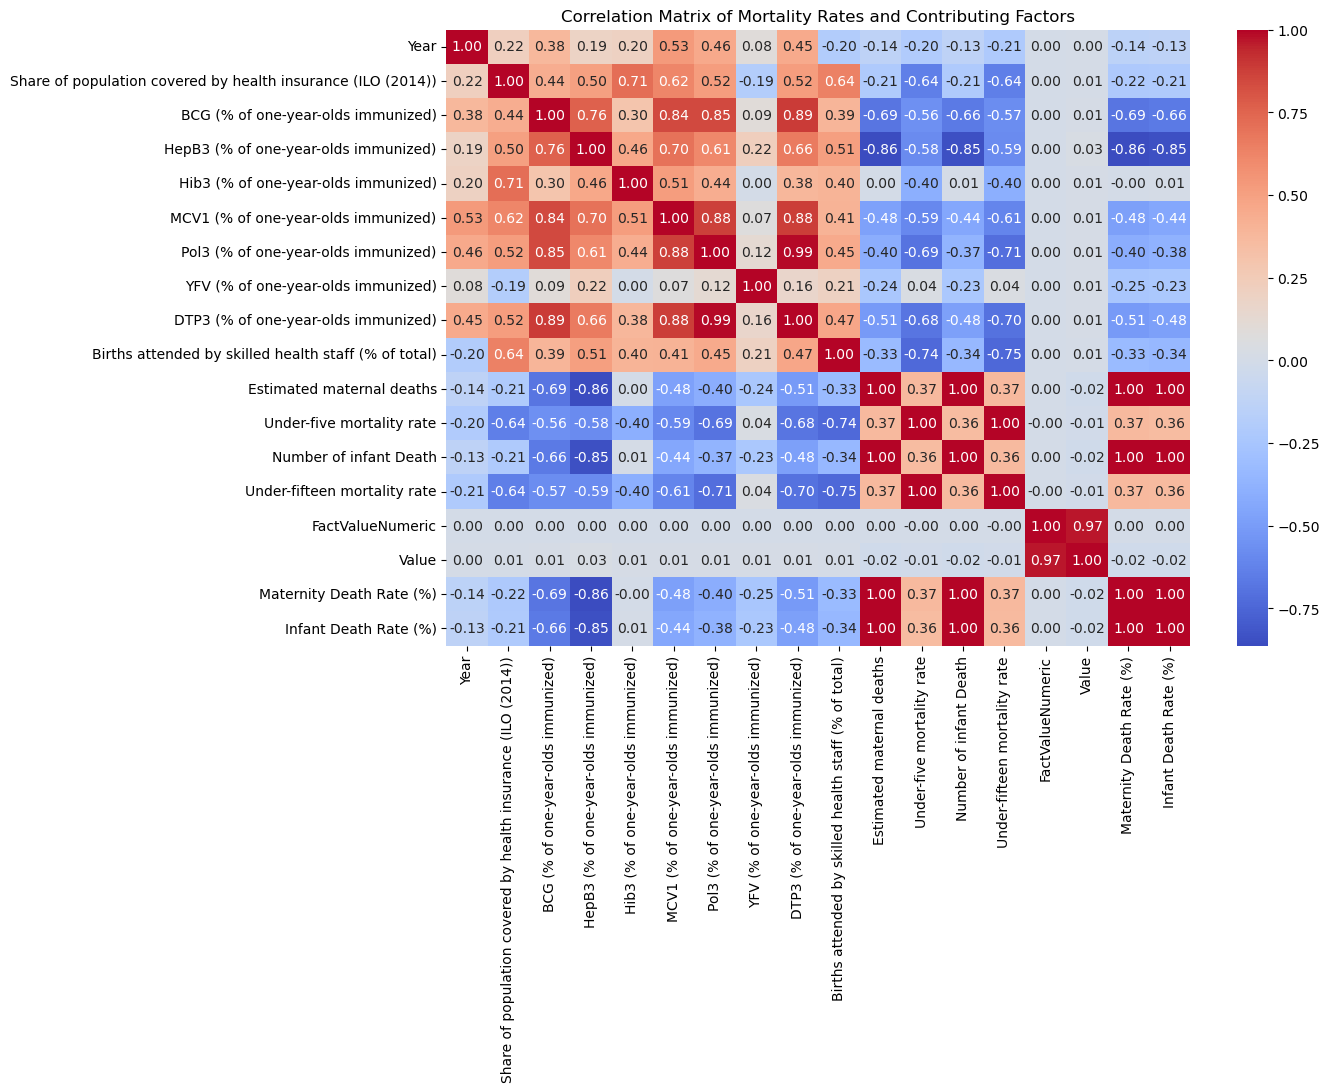

In [53]:
# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Mortality Rates and Contributing Factors")
plt.show()

##### From the above result we can see:

- There is a moderately negative correlation between the death rate of different age groups and immunizations like BCG, HepB3, MCV1 and DTP3 while the other immunizations showed a weak negative correlation.

- The Births attended by skilled health staff showed a strong negative corrlation with the under-five and under-fifteen mortality rate and showed a weak negative correlation with the marternal and infant deaths.

### Socioeconomic Factors: 

From the dataset, the only column that has a relationship to socioeconomy is the Share of population covered by health insurance (ILO (2014)). We will use this for this analysis.

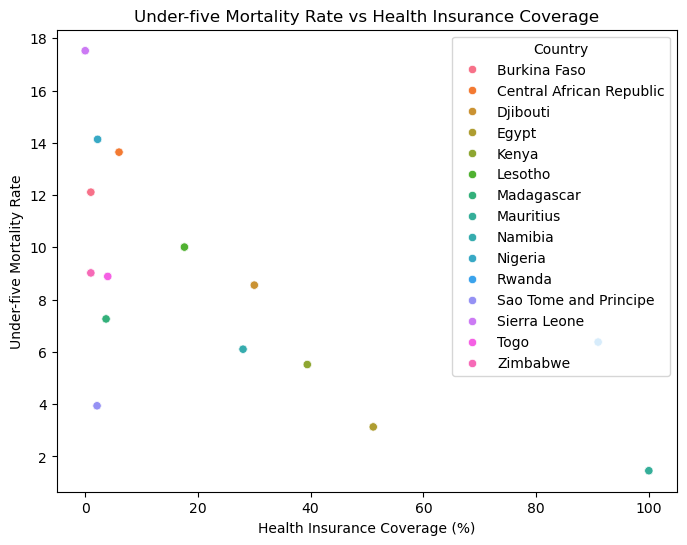

In [54]:
# Scatter plot: Under-five mortality vs health insurance coverage

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=Africa_df, 
    x='Share of population covered by health insurance (ILO (2014))',
    y='Under-five mortality rate', 
    hue='Country'
)
plt.title("Under-five Mortality Rate vs Health Insurance Coverage")
plt.xlabel("Health Insurance Coverage (%)")
plt.ylabel("Under-five Mortality Rate")
plt.show()

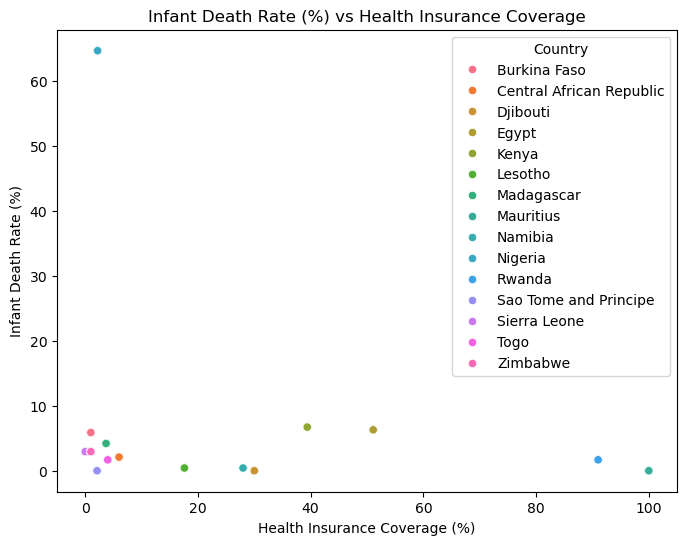

In [56]:
# Scatter plot: number of infant death vs health insurance coverage

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=Africa_df, 
    x='Share of population covered by health insurance (ILO (2014))',
    y='Infant Death Rate (%)', 
    hue='Country'
)
plt.title("Infant Death Rate (%) vs Health Insurance Coverage")
plt.xlabel("Health Insurance Coverage (%)")
plt.ylabel("Infant Death Rate (%)")
plt.show()

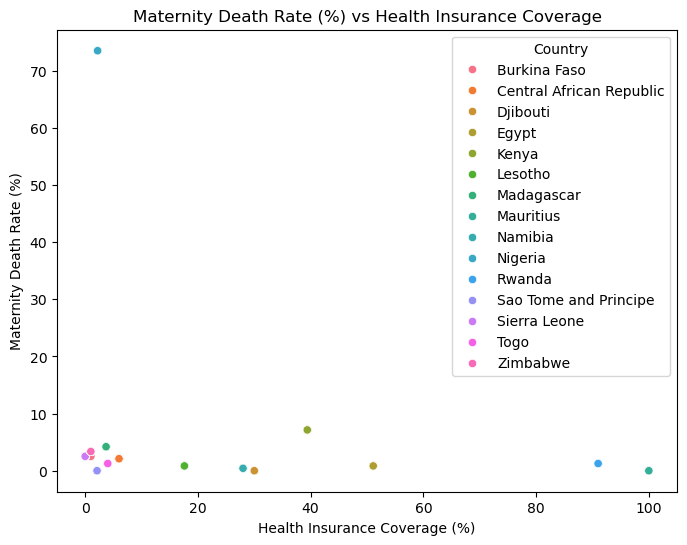

In [57]:
# Scatter plot: Estimated maternal deaths vs health insurance coverage

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=Africa_df, 
    x='Share of population covered by health insurance (ILO (2014))',
    y='Maternity Death Rate (%)', 
    hue='Country'
)
plt.title("Maternity Death Rate (%) vs Health Insurance Coverage")
plt.xlabel("Health Insurance Coverage (%)")
plt.ylabel("Maternity Death Rate (%)")
plt.show()

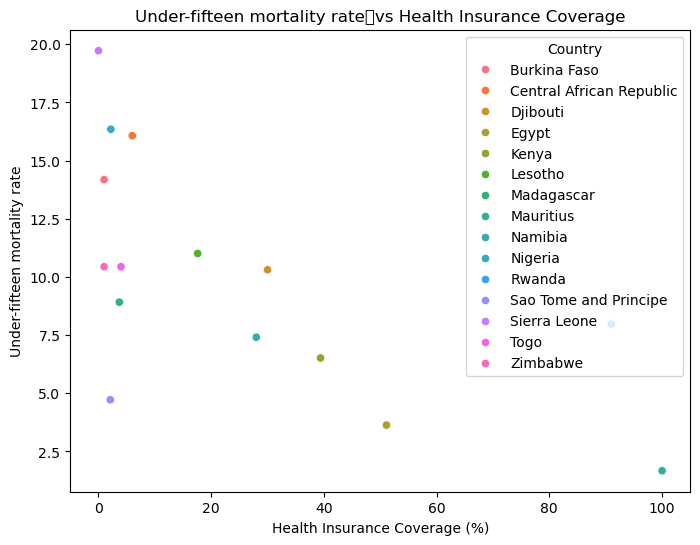

In [58]:
# Scatter plot: Under-fifteen mortality rate vs health insurance coverage

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=Africa_df, 
    x='Share of population covered by health insurance (ILO (2014))',
    y='Under-fifteen mortality rate', 
    hue='Country'
)
plt.title("Under-fifteen mortality rate	vs Health Insurance Coverage")
plt.xlabel("Health Insurance Coverage (%)")
plt.ylabel("Under-fifteen mortality rate")
plt.show()

From the above results, we can see that wih increase in health insurance comes decrease in Mortality rate which means health insurance has an impact on death rates. This could be because some people might not be able to afford to foot their hospital bill but with insurance available, this can help cover their medical bill and help them get medical treatment when needed.

### Health Factors

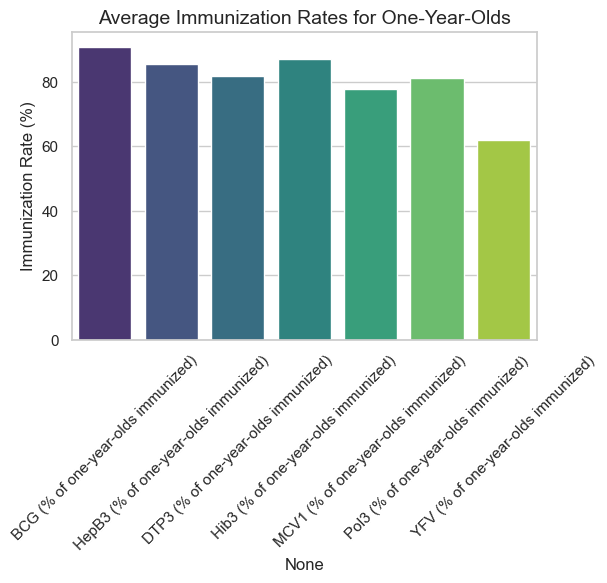

In [59]:
# Set style for seaborn
sns.set(style="whitegrid")

# 1. Bar Plot: Average Immunization Rates by Vaccine
immunization_cols = [
    'BCG (% of one-year-olds immunized)', 
    'HepB3 (% of one-year-olds immunized)', 
    'DTP3 (% of one-year-olds immunized)',
    'Hib3 (% of one-year-olds immunized)',
    'MCV1 (% of one-year-olds immunized)',
    'Pol3 (% of one-year-olds immunized)',
    'YFV (% of one-year-olds immunized)',
]
avg_immunization = Africa_df[immunization_cols].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_immunization.index, y=avg_immunization.values, palette="viridis")
plt.title("Average Immunization Rates for One-Year-Olds", fontsize=14)
plt.ylabel("Immunization Rate (%)")
plt.xticks(rotation=45)
plt.show()

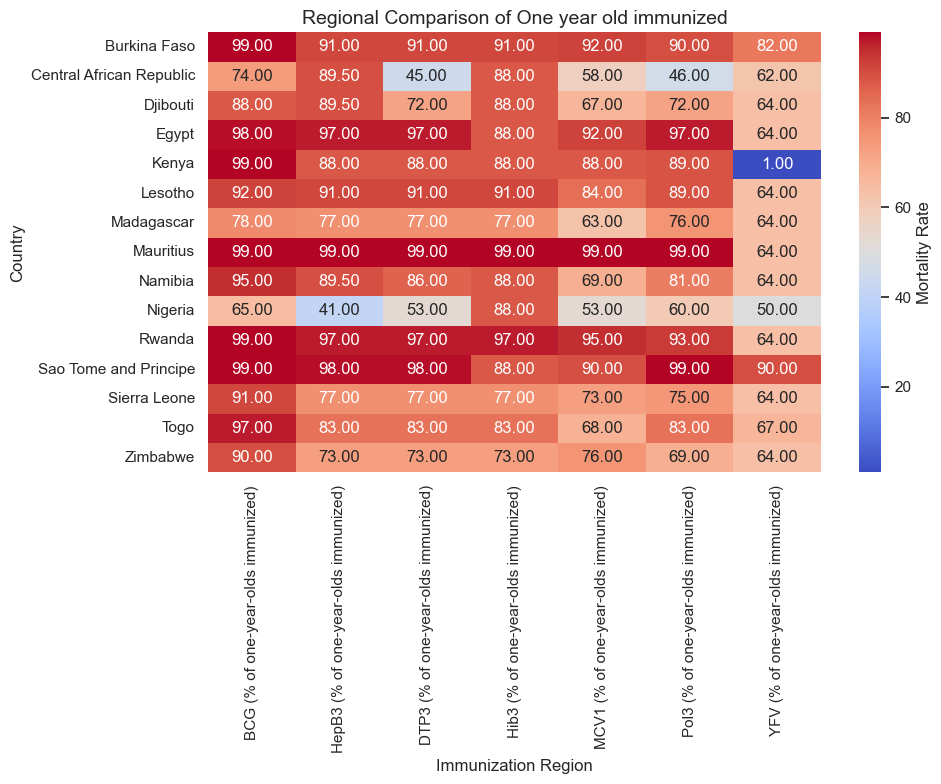

In [60]:
# Heatmap: Regional Mortality Comparison (Environmental Proxy)
plt.figure(figsize=(10, 8))
region_mortality2 = Africa_df.groupby('Country')[['BCG (% of one-year-olds immunized)', 
    'HepB3 (% of one-year-olds immunized)', 
    'DTP3 (% of one-year-olds immunized)',
    'Hib3 (% of one-year-olds immunized)',
    'MCV1 (% of one-year-olds immunized)',
    'Pol3 (% of one-year-olds immunized)',
    'YFV (% of one-year-olds immunized)']].mean()
sns.heatmap(
    pd.DataFrame(region_mortality2), 
    annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Mortality Rate'}
)
plt.title("Regional Comparison of One year old immunized", fontsize=14)
plt.ylabel("Country")
plt.xlabel("Immunization Region")
plt.tight_layout()
plt.show()

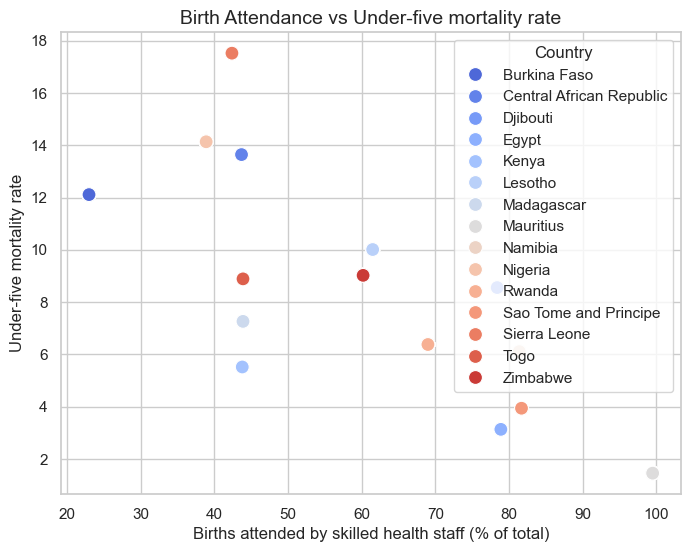

In [61]:
# scatter plot for Births attended by skilled health staff vs Under-five mortality rate

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=Africa_df, 
    x='Births attended by skilled health staff (% of total)', 
    y='Under-five mortality rate', 
    hue='Country', 
    palette='coolwarm', 
    s=100
)
plt.title("Birth Attendance vs Under-five mortality rate", fontsize=14)
plt.xlabel("Births attended by skilled health staff (% of total)")
plt.ylabel("Under-five mortality rate")
plt.show()



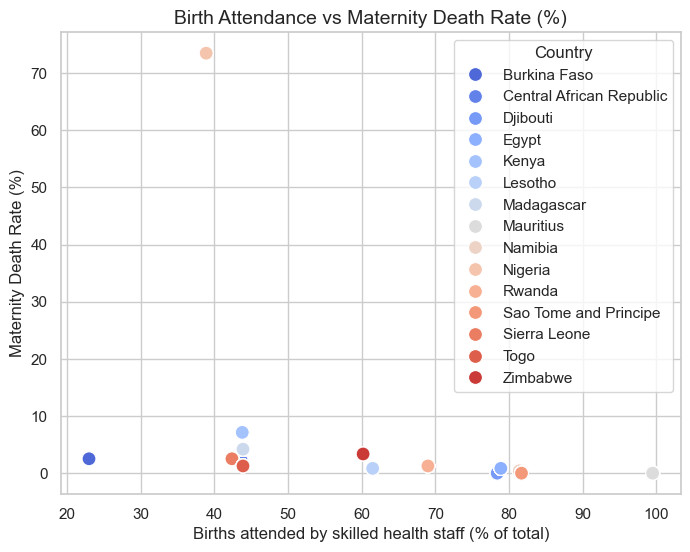

In [70]:
# scatter plot for Births attended by skilled health staff vs Estimated maternal deaths

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=Africa_df, 
    x='Births attended by skilled health staff (% of total)', 
    y='Maternity Death Rate (%)', 
    hue='Country', 
    palette='coolwarm', 
    s=100
)
plt.title("Birth Attendance vs Maternity Death Rate (%)", fontsize=14)
plt.xlabel("Births attended by skilled health staff (% of total)")
plt.ylabel("Maternity Death Rate (%)")
plt.show()

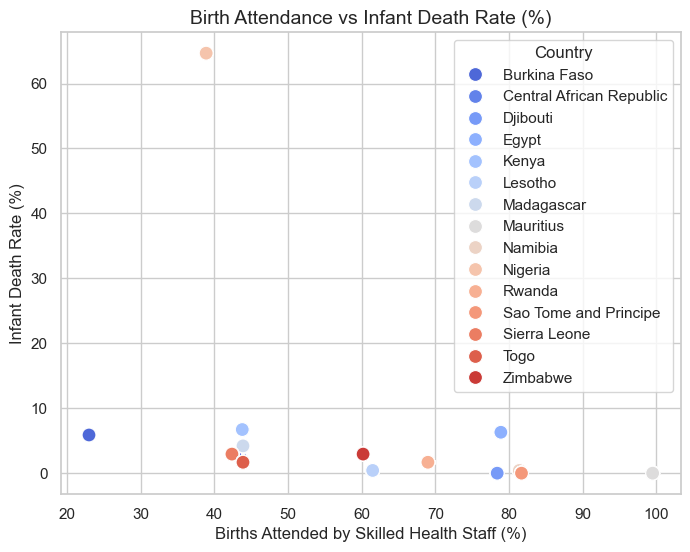

In [71]:
# Scatter Plot: Birth Attendance vs Number of infant Death, 
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=Africa_df, 
    x='Births attended by skilled health staff (% of total)', 
    y='Infant Death Rate (%)',
    hue='Country', 
    palette='coolwarm', 
    s=100
)
plt.title("Birth Attendance vs Infant Death Rate (%)", fontsize=14)
plt.xlabel("Births Attended by Skilled Health Staff (%)")
plt.ylabel("Infant Death Rate (%)")
plt.show()

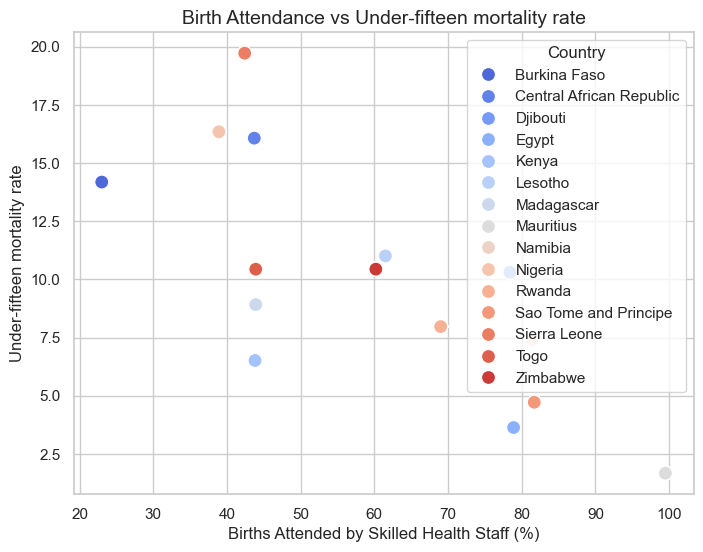

In [64]:
# Scatter Plot: Birth Attendance vs Under-fifteen mortality rate

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=Africa_df, 
    x='Births attended by skilled health staff (% of total)', 
    y='Under-fifteen mortality rate',
    hue='Country', 
    palette='coolwarm', 
    s=100
)
plt.title("Birth Attendance vs Under-fifteen mortality rate", fontsize=14)
plt.xlabel("Births Attended by Skilled Health Staff (%)")
plt.ylabel("Under-fifteen mortality rate")
plt.show()

From the above results of the health fctors analysis, we can say that health factors impact death rate.

Factors like birth attended to by skilled staffs, immunization of new borns etc.

We can see that when there is high attendanc by skilled staffs, the is low death rate also meaning that unskilled health staffs can affect death rate.
We can also see that with increase in immunization rate comes decrease in death rate.

### Environmental Factors

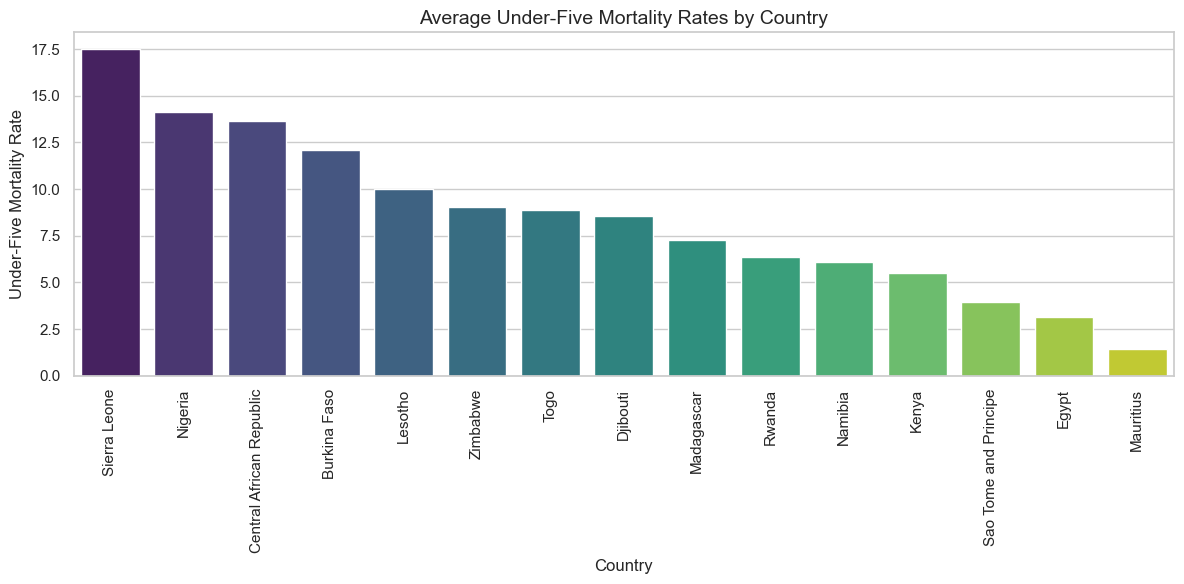

In [72]:
# Bar Plot: Mortality Rates by Country (Environmental Proxy)

plt.figure(figsize=(12, 6))
country_mortality = Africa_df.groupby('Country')['Under-five mortality rate'].mean().sort_values(ascending=False)
sns.barplot(x=country_mortality.index, y=country_mortality.values, palette='viridis')
plt.title("Average Under-Five Mortality Rates by Country", fontsize=14)
plt.ylabel("Under-Five Mortality Rate")
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.tight_layout()
plt.show()

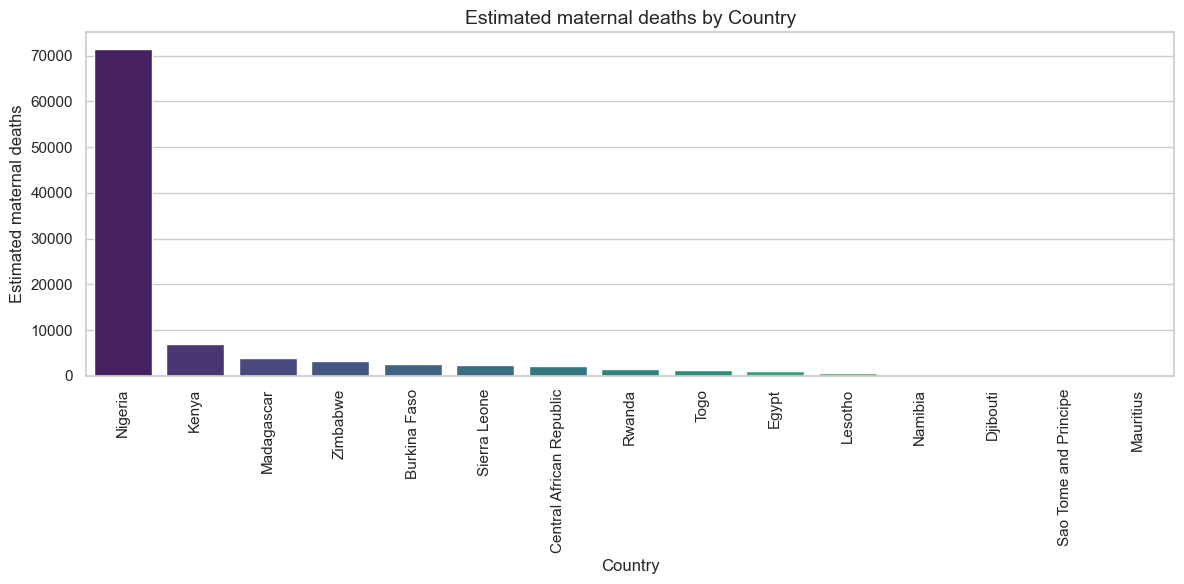

In [73]:
# Bar Plot: Mortality Rates by Country (Environmental Proxy)

plt.figure(figsize=(12, 6))
country_mortality = Africa_df.groupby('Country')['Estimated maternal deaths'].mean().sort_values(ascending=False)
sns.barplot(x=country_mortality.index, y=country_mortality.values, palette='viridis')
plt.title("Estimated maternal deaths by Country", fontsize=14)
plt.ylabel("Estimated maternal deaths")
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.tight_layout()
plt.show()

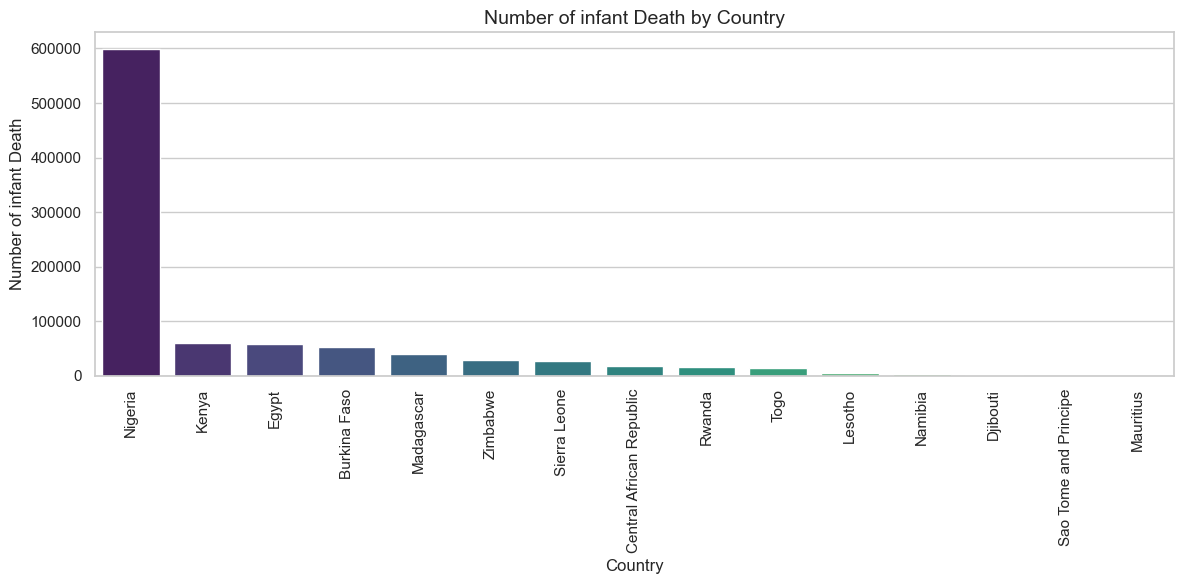

In [67]:
# Bar Plot: Mortality Rates by Country (Environmental Proxy)

plt.figure(figsize=(12, 6))
country_mortality = Africa_df.groupby('Country')['Number of infant Death'].mean().sort_values(ascending=False)
sns.barplot(x=country_mortality.index, y=country_mortality.values, palette='viridis')
plt.title("Number of infant Death by Country", fontsize=14)
plt.ylabel("Number of infant Death")
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.tight_layout()
plt.show()

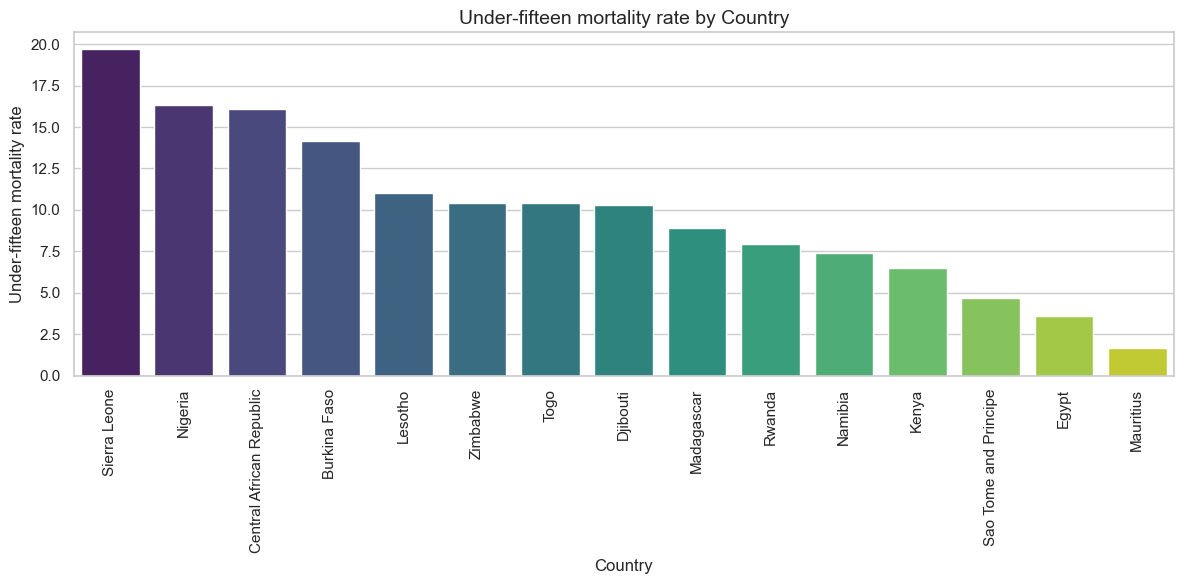

In [74]:
# Bar Plot: Mortality Rates by Country (Environmental Proxy)

plt.figure(figsize=(12, 6))
country_mortality = Africa_df.groupby('Country')['Under-fifteen mortality rate'].mean().sort_values(ascending=False)
sns.barplot(x=country_mortality.index, y=country_mortality.values, palette='viridis')
plt.title("Under-fifteen mortality rate by Country", fontsize=14)
plt.ylabel("Under-fifteen mortality rate")
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.tight_layout()
plt.show()

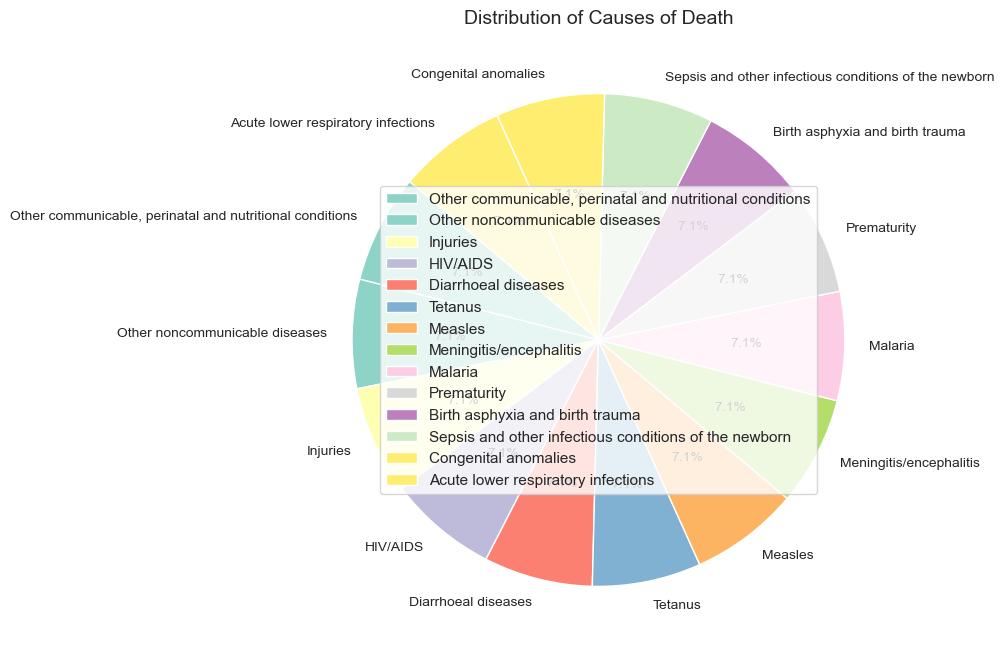

In [75]:
# Pie Chart: Causes of Death Distribution
plt.figure(figsize=(8, 8))
cause_distribution = Africa_df['Cause of Death'].value_counts()
cause_distribution.plot.pie(
    autopct='%1.1f%%', 
    startangle=140, 
    cmap='Set3', 
    legend=True, 
    fontsize=10
)
plt.title("Distribution of Causes of Death", fontsize=14)
plt.ylabel("")  # Hides the y-label for clarity
plt.show()

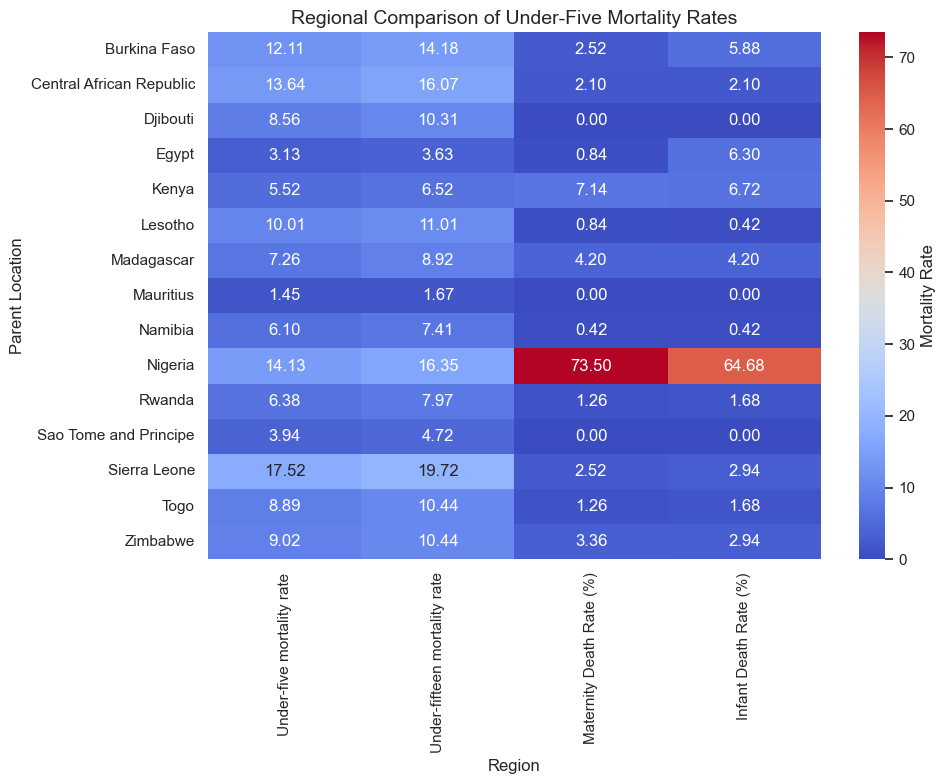

In [77]:
# Heatmap: Regional Mortality Comparison (Environmental Proxy)
plt.figure(figsize=(10, 8))
region_mortality = Africa_df.groupby('Country')[['Under-five mortality rate', 'Under-fifteen mortality rate', 'Maternity Death Rate (%)', 'Infant Death Rate (%)']].mean()
sns.heatmap(
    pd.DataFrame(region_mortality), 
    annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Mortality Rate'}
)
plt.title("Regional Comparison of Under-Five Mortality Rates", fontsize=14)
plt.ylabel("Parent Location")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

Environmental Factors impact mortality rate, for example, Nigeria has a high mortality rate across all age groups and this could be because of the low immunization coverage, low health insurance coverage and also low skilled staff. This shows that the condition of an environment can affect the mortality rate in that environmnet.

## Objective 2:
### Propose actionable recommendations to address gaps in vaccination coverage, healthcare access, and maternal support.


Here are actionable recommendations to address gaps in vaccination coverage, healthcare access, and maternal support:

1. Improving Vaccination Coverage
- Mobile Vaccination Units: Deploy mobile clinics in underserved rural and urban areas to ensure vaccine delivery in hard-to-reach regions.
- Community Health Workers (CHWs): Train and empower local health workers to educate communities, track immunization status, and administer vaccines.
- Incentives for Vaccination: Provide small incentives (e.g., food supplies, transportation support) to encourage vaccine uptake, especially among marginalized populations.
- Digital Tracking Systems: Implement or enhance digital systems to monitor vaccination rates and identify coverage gaps in real-time.
- Targeted Outreach Campaigns: Design culturally appropriate campaigns to counter vaccine hesitancy, using community leaders, media, and peer education.
- School-Based Programs: Partner with schools to provide regular vaccination drives and keep immunization records for children.

2. Expanding Healthcare Access
- Telemedicine Services: Introduce virtual consultations to reach remote areas where physical healthcare infrastructure is lacking.
- Affordable Health Insurance: Promote government-subsidized insurance plans for low-income families to reduce out-of-pocket expenses.
- Healthcare Infrastructure Development: Increase investments in building and staffing primary healthcare centers (PHCs) in underserved communities.
- Task Shifting: Train non-physician healthcare providers, such as nurses or CHWs, to perform basic medical services.
- Mobile Health Clinics: Deploy clinics to bring essential services like immunization, antenatal care, and diagnostics closer to communities.
- Public-Private Partnerships: Encourage collaboration with NGOs and private entities to bridge gaps in service delivery.

3. Strengthening Maternal Support
- Accessible Antenatal Care (ANC): Ensure all pregnant women have access to at least four ANC visits through mobile clinics, CHWs, or community midwives.
- Maternal Health Education: Launch programs on nutrition, family planning, and newborn care through workshops, media, and peer groups.
- Maternity Leave Policies: Advocate for paid maternity leave and flexible work arrangements to support working mothers.
- Nutrition Support Programs: Provide micronutrient supplements and food packages to address malnutrition during pregnancy and postnatal periods.
- Community-Based Birthing Centers: Establish local birthing centers staffed with trained midwives to provide affordable and safe deliveries.
- Postnatal Follow-Up Services: Implement routine postnatal home visits for healthcare checks and mental health support.

Cross-Cutting Strategies
- Data-Driven Interventions: Use healthcare data to identify vulnerable populations, track vaccination trends, and allocate resources effectively.
- Cultural Sensitivity: Engage trusted community leaders and influencers to address cultural or religious barriers.
- Government Policies & Funding: Advocate for increased funding for maternal healthcare, vaccination drives, and community-based health programs.
- Monitoring & Evaluation: Set up systems to assess program effectiveness and ensure accountability in implementation.

## Objective 3

### Present insights in a format that is accessible to policymakers and stakeholders

## Policy Action Plan: Addressing Gaps in Vaccination Coverage, Healthcare Access, and Maternal Support

### 1. Vaccination Coverage
#### Goal: 
Achieve universal immunization by improving access, addressing hesitancy, and enhancing tracking.

#### Key Actions:

1. Deploy Mobile Vaccination Units
- Reach underserved rural and urban populations.
- Partner with local governments and NGOs.

2. Train Community Health Workers (CHWs)

- Equip CHWs to educate, track, and deliver vaccines.
- Incentivize CHWs to reach high-risk communities.

3. Introduce Digital Immunization Systems

- Monitor vaccination data in real-time to identify gaps.
- Use dashboards for policy and resource decisions.

4. Launch Targeted Outreach Campaigns

- Address vaccine hesitancy using community influencers and media.
- Develop culturally sensitive awareness materials.

### 2. Healthcare Access
#### Goal: 
Ensure equitable, affordable, and reliable access to healthcare for all populations.

#### Key Actions:

1. Expand Telemedicine Services

- Provide virtual healthcare consultations for remote communities.
- Invest in affordable digital health platforms.

2. Build and Staff Primary Healthcare Centers (PHCs)

- Prioritize underserved areas for infrastructure development.
- Recruit and train local health personnel to reduce staffing shortages.

3. Launch Mobile Health Clinics

- Deliver diagnostic, vaccination, and emergency services.
- Collaborate with public and private partners for funding.

4. Introduce Subsidized Health Insurance

- Reduce financial barriers for low-income families.
- Partner with insurance providers to design affordable plans.

### 3. Maternal Support
#### Goal: 
Improve maternal health outcomes through access to quality care, education, and postnatal services.

#### Key Actions:

1. Ensure Accessible Antenatal Care (ANC)

- Provide at least 4 ANC visits for all pregnant women.
- Use mobile clinics and CHWs to increase outreach.

2. Nutrition and Maternal Health Programs

- Distribute supplements and food packages to prevent malnutrition.
- Educate mothers on nutrition, breastfeeding, and childcare.

3. Strengthen Maternity Leave Policies

- Advocate for paid maternity leave to support working mothers.
- Promote workplace flexibility for postnatal recovery.

4. Establish Community Birthing Centers

- Offer affordable and safe delivery options closer to home.
- Train midwives and healthcare providers.

5. Implement Postnatal Home Visits

- Provide follow-up care for mothers and newborns.
- Include mental health support and newborn assessments.

### 4. Cross-Cutting Enablers
1. Data-Driven Decision Making: Use health data to prioritize interventions and track progress.
2. Community Engagement: Partner with trusted leaders to build trust and foster participation.
3. Public-Private Partnerships (PPPs): Leverage resources from government, NGOs, and private sectors.
4. Monitoring & Evaluation (M&E): Establish measurable indicators to evaluate success and make adjustments.

### Next Steps for Policymakers
1. Commit Resources: Allocate funding to critical areas, especially maternal care and vaccination.
2. Strengthen Collaboration: Engage with stakeholders (NGOs, private sector, community leaders).
3. Pilot Programs: Roll out mobile clinics, telemedicine, and CHW initiatives in priority regions.
4. Scale Up Data Systems: Adopt digital platforms to monitor health metrics and improve accountability.

### Summary:
Implementing these targeted actions will bridge gaps in vaccination coverage, improve healthcare access, and provide essential maternal support. These interventions will directly contribute to healthier communities and long-term social and economic growth.


